# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [18]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [19]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [20]:
# Load the dataset
df = pd.read_csv('hospital-info.csv')  # Make sure to replace 'your_data_file.csv' with the actual file name

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display descriptive statistics for important columns
important_columns = ['Hospital overall rating', 'Mortality national comparison', 'Safety of care national comparison',
                      'Patient experience national comparison', 'Effectiveness of care national comparison']
print("\nDescriptive Statistics:")
print(df[important_columns].describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                   

In [75]:
# Check the data type of different columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [22]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

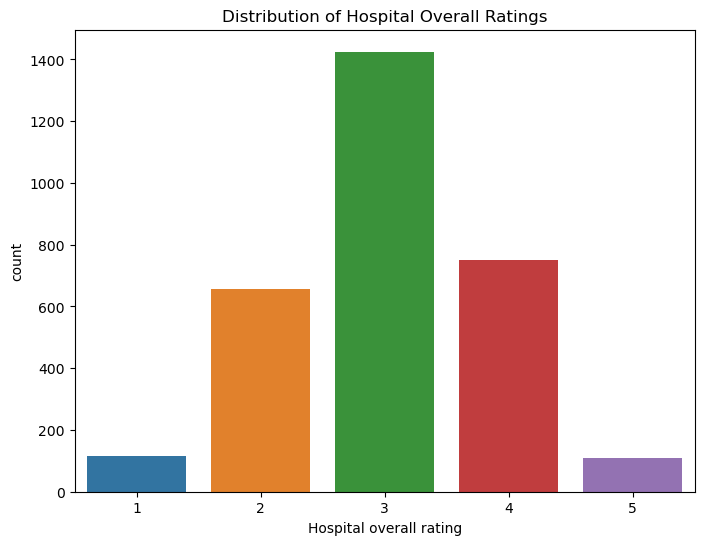

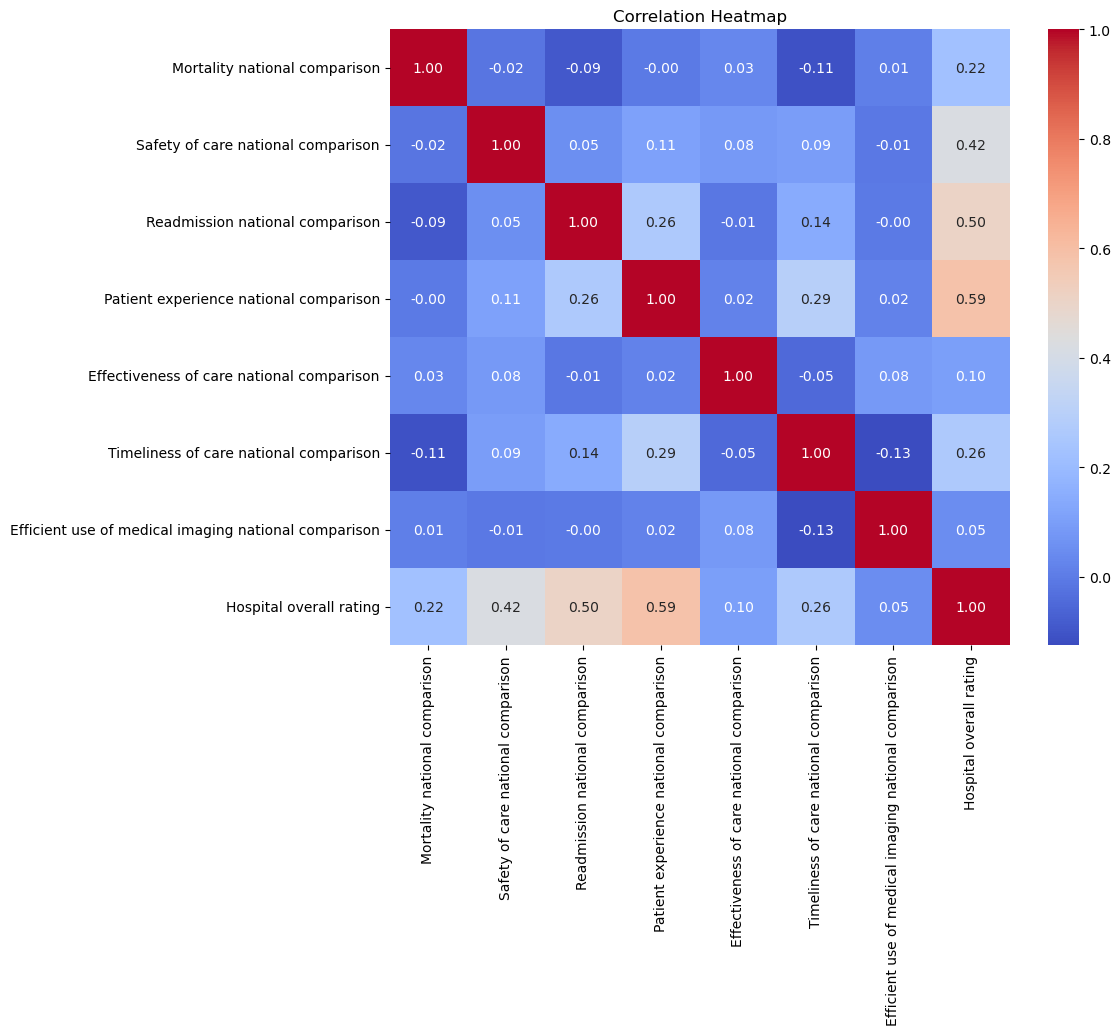

In [23]:
# Filter out the specified columns and compute descriptive statistics
main_measures_stats = df[features].describe()

# Plot the distribution of the target variable "Hospital overall rating"
plt.figure(figsize=(8, 6))
sns.countplot(x='Hospital overall rating', data=df)
plt.title('Distribution of Hospital Overall Ratings')
plt.show()

# Plot a correlation heatmap between main measures and the target variable
plt.figure(figsize=(10, 8))
correlation_matrix = df[features + ['Hospital overall rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Check how hospital ratings vary across "State"
state_rating_pivot = df.pivot_table(values='Hospital overall rating', index='State', aggfunc='mean')

# Check how hospital ratings vary across "Hospital Ownership"
ownership_rating_pivot = df.pivot_table(values='Hospital overall rating', index='Hospital Ownership', aggfunc='mean')



Note down your observations after completing the above task. You should ask questions such as:

- How are ratings distributed? the Are you seeing any peculiar distributions for the ratings?
- How do the correlations between the measures and the target variable look like?
- How do ratings vary across the different levels of the parameter that you have taken?

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [62]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [63]:
# Drop demographic features
demo_features = ['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number']
df2 = df.drop(demo_features, axis=1)

# Display the first 5 rows of df2
print(df2.head())

# Recheck columns for any other unnecessary features
print(df2.columns)


  Hospital Ownership Emergency Services  Hospital overall rating  \
0         Government                Yes                        3   
1         Government                Yes                        3   
2         Government                Yes                        2   
3          Voluntary                Yes                        3   
4             Others                Yes                        3   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   2   
1                              0                                   1   
2                              0                                   1   
3                              1                                   1   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                1                                       0   
1 

In [64]:
# Identify and drop any other unnecessary columns
# For simplicity, let's drop 'rating_group' as it's not needed for building machine learning models
df2 = df2.drop('rating_group', axis=1)


# Recheck columns after dropping unnecessary features
print(df2.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Hospital Ownership                                    3057 non-null   object 
 1   Emergency Services                                    3057 non-null   object 
 2   Hospital overall rating                               3057 non-null   int64  
 3   Mortality national comparison                         3057 non-null   int64  
 4   Safety of care national comparison                    3057 non-null   int64  
 5   Readmission national comparison                       3057 non-null   int64  
 6   Patient experience national comparison                3057 non-null   int64  
 7   Effectiveness of care national comparison             3057 non-null   int64  
 8   Timeliness of care national comparison                3057

In [65]:
# Create dummy variables for categorical columns
df2 = pd.get_dummies(df2, columns=['Hospital Ownership', 'Emergency Services'])

# Display the first 5 rows of the modified DataFrame
print(df2.head())

# Check the shape of the DataFrame to ensure everything is in order
print(df2.shape)


   Hospital overall rating  Mortality national comparison  \
0                        3                              1   
1                        3                              0   
2                        2                              0   
3                        3                              1   
4                        3                              1   

   Safety of care national comparison  Readmission national comparison  \
0                                   2                                1   
1                                   1                                2   
2                                   1                                1   
3                                   1                                0   
4                                   1                                1   

   Patient experience national comparison  \
0                                       0   
1                                       1   
2                                       0   
3       

##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [66]:
# Map the ratings as per the given instructions
df2['Hospital overall rating'] = df2['Hospital overall rating'].map(lambda x: 0 if x in [1, 2, 3] else 1)


##### Convert the datatypes of the categorical variables

In [67]:
# Assuming 'Hospital overall rating' is the target variable
# Convert other categorical columns to the appropriate data types
categorical_columns = ['Mortality national comparison', 'Safety of care national comparison',
                        'Readmission national comparison', 'Patient experience national comparison',
                        'Effectiveness of care national comparison', 'Timeliness of care national comparison',
                        'Efficient use of medical imaging national comparison']

df2[categorical_columns] = df2[categorical_columns].astype('category')


##### Data Preparation and Train-test split

In [68]:
# Create X and y variables
X = df2.drop('Hospital overall rating', axis=1)
y = df2['Hospital overall rating']

# Create dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Perform the train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 2001 to 2732
Data columns (total 94 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MORT_30_AMI_Score                                       2139 non-null   float64
 1   MORT_30_CABG_Score                                      2139 non-null   float64
 2   MORT_30_COPD_Score                                      2139 non-null   float64
 3   MORT_30_HF_Score                                        2139 non-null   float64
 4   MORT_30_PN_Score                                        2139 non-null   float64
 5   MORT_30_STK_Score                                       2139 non-null   float64
 6   READM_30_AMI_Score                                      2139 non-null   float64
 7   READM_30_CABG_Score                                     2139 non-null   float64
 8   READM_30_COPD_Score                

In [31]:
# Scale and standardize the numerical variables using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
##Model 1: Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=0)

# Fit the model on the scaled training data
logreg_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9629629629629629
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       655
           1       0.96      0.91      0.93       263

    accuracy                           0.96       918
   macro avg       0.96      0.95      0.95       918
weighted avg       0.96      0.96      0.96       918



In [34]:
##Model 2: k-Nearest Neighbors (k-NN)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the scaled training data
knn_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN Accuracy:", accuracy_knn)

# Additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


k-NN Accuracy: 0.8594771241830066
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       655
           1       0.77      0.72      0.75       263

    accuracy                           0.86       918
   macro avg       0.83      0.82      0.82       918
weighted avg       0.86      0.86      0.86       918



In [36]:
##Model 3: Decision Tree


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8311546840958606
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       655
           1       0.73      0.65      0.69       263

    accuracy                           0.83       918
   macro avg       0.80      0.78      0.79       918
weighted avg       0.83      0.83      0.83       918



#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [85]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load the 'not_yet_rated' dataset
new_hospitals = pd.read_csv('not_yet_rated.csv')


# Define the columns to drop
demo_features = ['Provider ID', 'Hospital Ownership', 'Emergency Services',
                 'Mortality national comparison', 'Safety of care national comparison',
                 'Readmission national comparison', 'Patient experience national comparison',
                 'Effectiveness of care national comparison', 'Timeliness of care national comparison',
                 'Efficient use of medical imaging national comparison']

# Check if the columns exist before dropping them
columns_to_drop = [col for col in demo_features if col in new_hospitals.columns]
new_hospitals.drop(columns_to_drop, axis=1, inplace=True)

# Map the ratings if the 'Hospital overall rating' column is present
if 'Hospital overall rating' in new_hospitals.columns:
    new_hospitals['Hospital overall rating'] = new_hospitals['Hospital overall rating'].map(lambda x: 0 if x in [1, 2, 3] else 1)

# Load the original training data
original_training_data = pd.read_csv('hospital-info.csv')

# Columns to drop
columns_to_drop = ['Hospital Name', 'Address', 'City', 'State', 'ZIP Code', 'County Name', 'Phone Number', 'Hospital overall rating']

# Drop the specified columns
original_training_data.drop(columns_to_drop, axis=1, inplace=True)


# Find common columns
common_columns = set(original_training_data.columns) & set(new_hospitals.columns)

# Select only the common columns in both datasets
original_training_data = original_training_data[common_columns]
new_hospitals = new_hospitals[common_columns]

# Add missing columns to the new dataset
missing_columns = set(original_training_data.columns) - set(new_hospitals.columns)
for col in missing_columns:
    new_hospitals[col] = 0  # You can use 0 as a default value or any other appropriate value


    

    
    
    
# Ensure the new dataset has the same features as the model was trained on
new_hospitals = new_hospitals[original_training_data.columns]




# Standardize the numerical variables using the same scaler
numerical_columns = new_hospitals.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
new_hospitals[numerical_columns] = scaler.fit_transform(new_hospitals[numerical_columns])

# Initialize and fit the Logistic Regression model on the extended dataset
logreg_model = LogisticRegression(random_state=0)
logreg_model.fit(X_train_scaled, y_train)

# Predictions on the new hospitals
predicted_ratings = logreg_model.predict(new_hospitals)

# Add the predicted ratings to the new_hospitals dataframe
new_hospitals['Predicted Rating'] = predicted_ratings

# Display the predictions
print("Predicted Ratings for New Hospitals:")
print(new_hospitals[['Hospital ID', 'Predicted Rating']])

# Recommendations for improvement plan for hospitals with low ratings
low_rated_hospitals = new_hospitals[new_hospitals['Predicted Rating'] == 0]
print("\nRecommendations for Hospitals with Low Ratings:")
for index, row in low_rated_hospitals.iterrows():
    print(f"\nHospital ID: {row['Hospital ID']}")
    print("Recommendations:")
    # Provide specific recommendations for improvement based on the features in the dataset
    # You can customize this based on your dataset and domain knowledge
    # Example: "Focus on improving patient experience and timeliness of care."


ValueError: X has 76 features, but LogisticRegression is expecting 94 features as input.

### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 